# Задание 1

Для функции $y(x) = \frac{\vert x \vert}{x + 2}$, заданной на отрезке $[-1,1]$, построить интерполяционный многочлен в форме Лагранжа на равномерной сетке из $n$ узлов (крайний левый узел поместите в точку $-1$, правый – в точку $1$). Теоретически оцените погрешность интерполяции и сравните ее с фактической (т. е. разностью между исходной функцией и ее интерполянтом по данной таблице значений в узлах) погрешностью для $n=3$ и $5$.

Как будет меняться фактическая погрешность восстановления функции с ростом степени полинома для равномерной сетки? Рассмотреть случаи $n=3, 5, 11, 21, 51$


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set()

from scipy.interpolate import lagrange

import matplotlib.pyplot as plt
%matplotlib inline

**Рассмотрим график предоставленной функции**

In [2]:
x = np.linspace(-1, 1, 1000)
y = np.abs(x) / (x + 2)

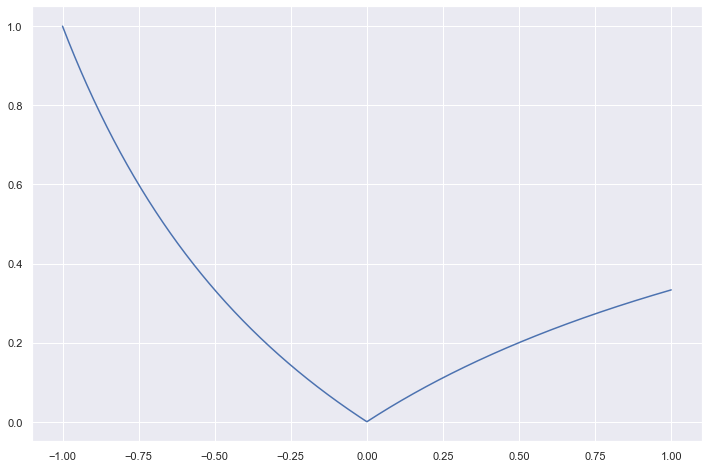

In [3]:
plt.figure(figsize=(12, 8))
sns.lineplot(x = x, y = y)

**Напишем функцию, которая понадобится нам далее**

In [4]:
def get_func_task1(x):
    return np.abs(x) / (x + 2)

def build_lagrange_poly_and_plot(N):
    """Builds of lagrange polynom
    """
    x_n = np.linspace(-1, 1, N)
    space = np.linspace(-1, 1, 1000)
    y_n = get_func_task1(x_n)
    y_space = get_func_task1(space)
    poly = lagrange(x_n, y_n)    
    data = pd.concat([pd.Series(space), \
                      pd.Series(y_space), \
                      pd.Series(np.polyval(poly, space))], axis = 1)
    data = pd.DataFrame(data)
    data.columns = ['x', 'real', 'lagrange']
    data.set_index(['x'], drop = True, inplace = True)
    plt.figure(figsize=(12, 8))
    sns.lineplot(data = data)

Рассмотрим при $n = 3$

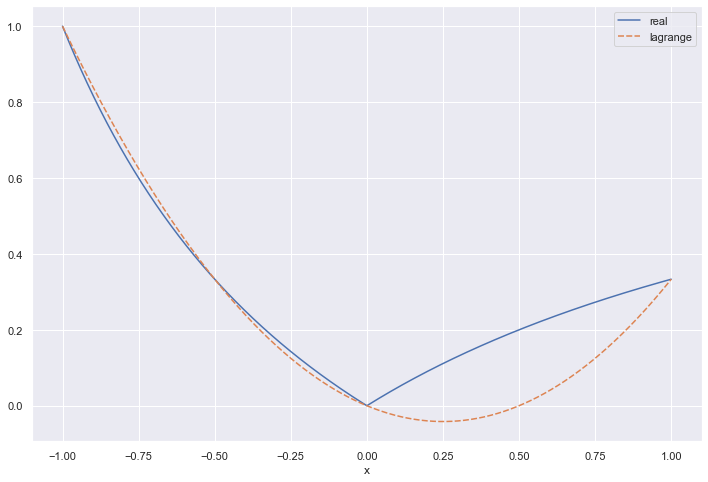

In [5]:
build_lagrange_poly_and_plot(3)

Рассмотрим при $n = 5$

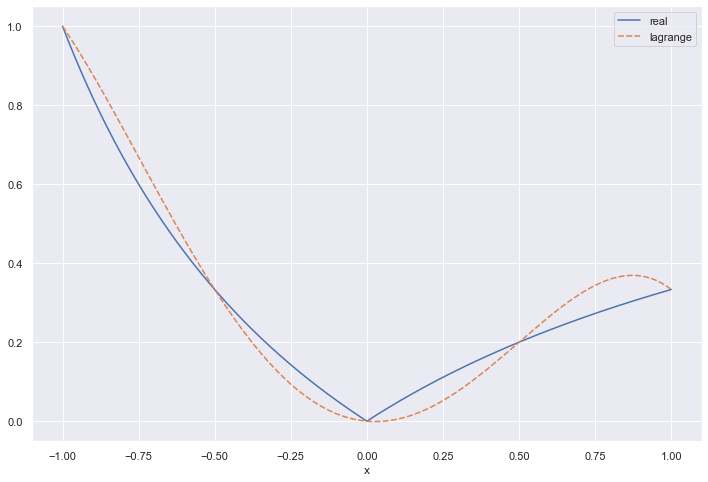

In [6]:
build_lagrange_poly_and_plot(5)

Рассмотрим при $n = 11$

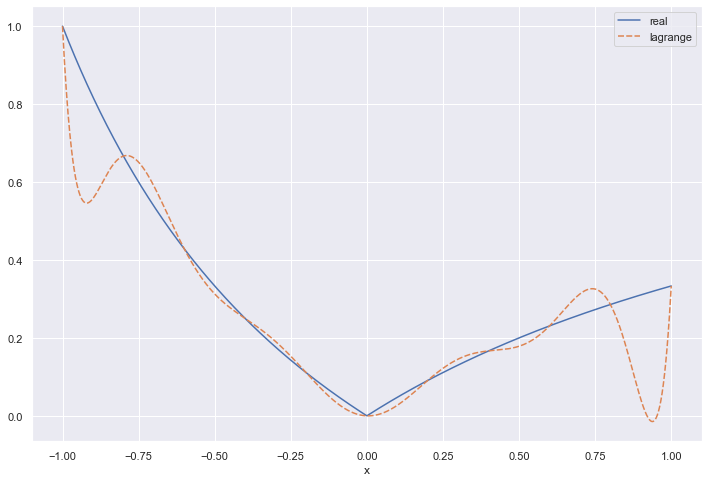

In [7]:
build_lagrange_poly_and_plot(11)

Рассмотрим при $n = 21$

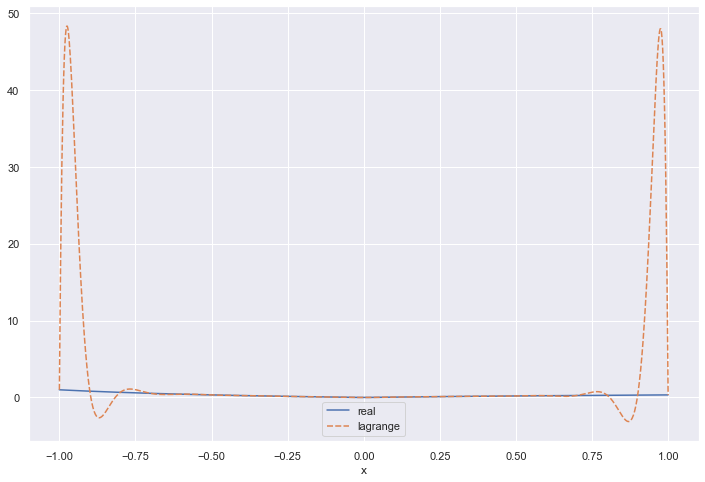

In [8]:
build_lagrange_poly_and_plot(21)

Рассмотрим при $n = 51$

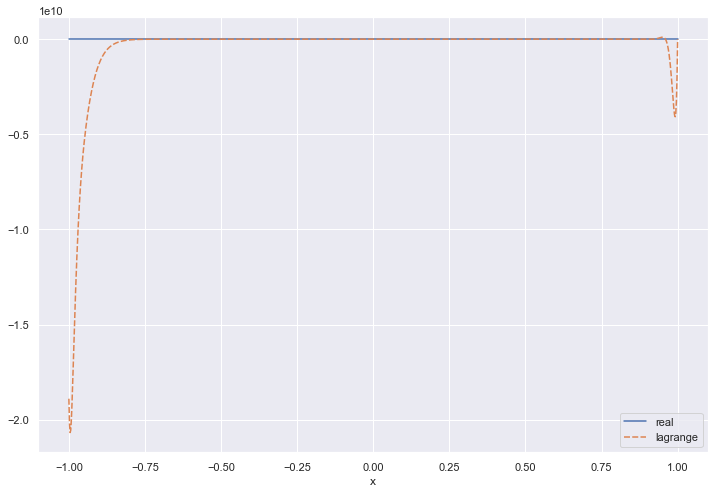

In [9]:
build_lagrange_poly_and_plot(51)

Оценим погрешность для $n = 3$ и $n = 5$

Поскольку в функции присутствует модуль, мы не можем оценить погрешность по формуле с производной, однако, стоит отметить, что при больших степенях она велика, что заметно на последнем графиках (интерполяционные многочлены сильно осциллируют). Это обусловлено тем, что при большом количестве узлов знаменатель будет стремиться к нулю, а следовательно, коэффициенты будут очень большими.

# Задание 2

Выберите целую (разлагающуюся в сходящийся степенной ряд для любого конечного x) функцию из таблицы и постройте 
на сетке из равноотстоящих узлов глобальный алгебраический интерполянт. Сравните различные способы вычисления 
интерполяционного полинома:

    а) записывая интерполяционный многочлен в форме Лагранжа;
    
    б) записывая интерполяционный многочлен в форме Ньютона.
    
Выберите число узлов n = 11, 21, 51, 91. Почему результаты использования формы Ньютона и
Лагранжа в начале совпадают, а затем начинают различаться?

Функция: $y = e^x$

In [10]:
def get_func_task2(x):
    return np.exp(x)

def getNDDCoeffs(x, y):
    """ Creates NDD pyramid and extracts coeffs """
    n = np.shape(y)[0]
    pyramid = np.zeros([n, n]) 
    pyramid[::, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            pyramid[i][j] = (pyramid[i + 1][j - 1] - pyramid[i][j - 1]) / (x[i + j] - x[i])
    return pyramid[0]

def build_lagrange_newton_poly_and_plot(N):
    """Builds of lagrange and newtom polynom
    """
    x_n = np.linspace(-1, 1, N)
    space = np.linspace(-1, 1, 1000)
    y_n = get_func_task2(x_n)
    y_space = get_func_task2(space)
    poly = lagrange(x_n, y_n)
    
    coeff_vector = getNDDCoeffs(x_n, y_n)

    final_pol = np.polynomial.Polynomial([0.])
    for i in range(N):
        p = np.polynomial.Polynomial([1.])
        for j in range(i):
            p_temp = np.polynomial.Polynomial([-x_n[j], 1.])
            p = np.polymul(p, p_temp) 
        p *= coeff_vector[i]
        final_pol = np.polyadd(final_pol, p) 

    p = np.flip(final_pol[0].coef, axis=0)
    
    data = pd.concat([pd.Series(space), pd.Series(y_space), pd.Series(np.polyval(poly, space)), \
                      pd.Series(np.polyval(p, space))], axis = 1)
    data = pd.DataFrame(data)
    data.columns = ['x', 'real', 'lagrange', 'newton']
    data.set_index(['x'], drop = True, inplace = True)
    plt.figure(figsize=(12, 8))
    sns.lineplot(data = data)

**Рассмотрим график предоставленной функции**

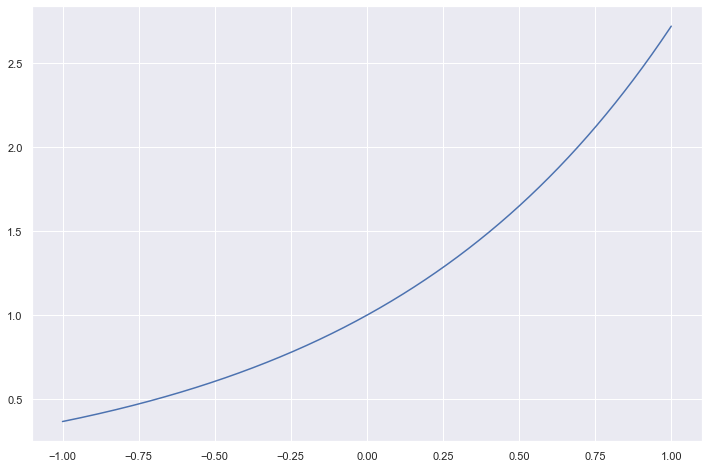

In [11]:
x_task2 = np.linspace(-1, 1, 1000)
y_task2 = np.exp(x_task2)
plt.figure(figsize=(12, 8))
sns.lineplot(x = x_task2, y = y_task2)

Рассмотрим при $n = 11$

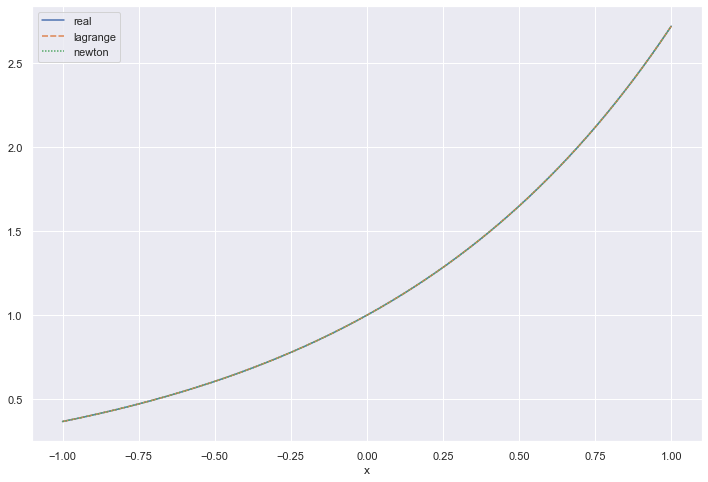

In [12]:
build_lagrange_newton_poly_and_plot(11)

Рассмотрим при $n = 21$

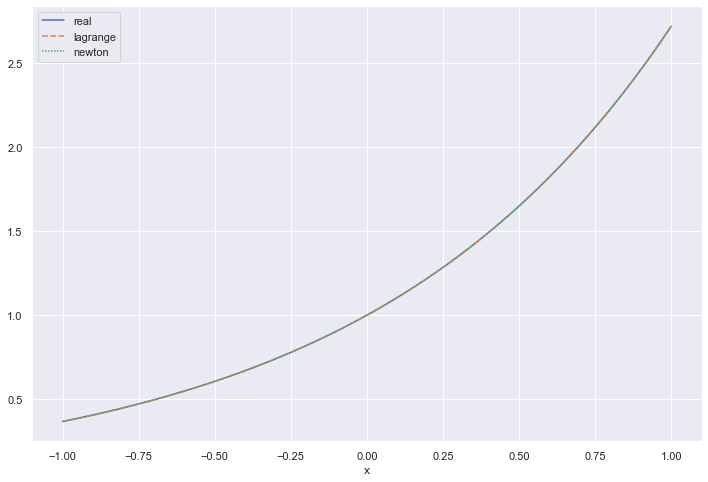

In [13]:
build_lagrange_newton_poly_and_plot(21)

Рассмотрим при $n = 51$

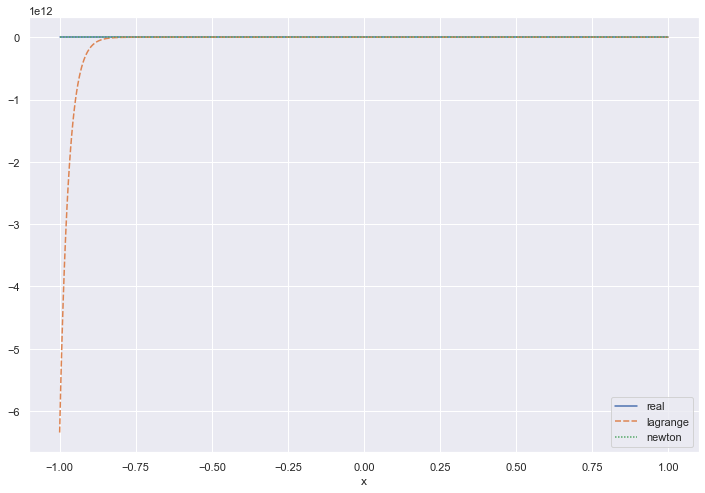

In [14]:
build_lagrange_newton_poly_and_plot(51)

Рассмотрим при $n = 91$

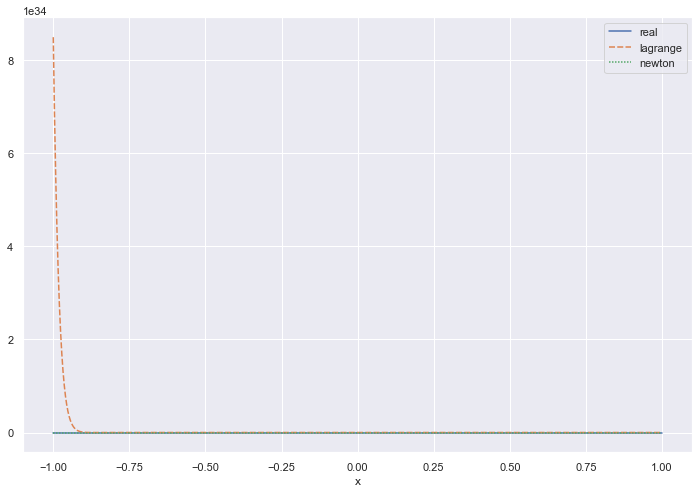

In [15]:
build_lagrange_newton_poly_and_plot(91)

Как было упомянуто выше, для интерполяции методом Лагранжа при большом количестве узлов знаменатель будет мал, и коэффициенты при степенях многочлена многократно возрастут. При использовании метода Ньютона такой проблемы не возникает.